In [153]:
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
df = pd.read_csv('data/NVDA.csv', usecols=['date','adj_open','adj_high','adj_low', 'adj_close', 'adj_volume'], delimiter='\t', header=0, index_col='date', parse_dates=True)

In [155]:
df.shape

(4804, 5)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4804 entries, 1999-01-22 to 2018-02-26
Data columns (total 5 columns):
adj_open      4804 non-null float64
adj_high      4804 non-null float64
adj_low       4804 non-null float64
adj_close     4804 non-null float64
adj_volume    4804 non-null float64
dtypes: float64(5)
memory usage: 225.2 KB


In [157]:
df.head()

,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,
1999-01-22,1.623824,1.812497,1.440564,1.522529,67867200.0
1999-01-25,1.643156,1.701149,1.522529,1.681818,12762000.0
1999-01-26,1.701149,1.735172,1.527168,1.551139,8580000.0
1999-01-27,1.556552,1.595214,1.469174,1.546499,6109200.0
1999-01-28,1.546499,1.556552,1.531808,1.541860,5688000.0


In [158]:
df['rolling_mean'] = df['adj_close'].rolling(window=20, center=False).mean()

In [159]:
plt.plot(df['adj_close'], label='NVDA')

In [160]:
# df['rolling_mean'].plot(label='NVDA rolling mean')
plt.plot(df['rolling_mean'], label='NVDA rolling mean')
plt.rcParams['figure.figsize'] = 16, 12

In [161]:
df['shifted_price_5'] = df['adj_close'].shift(periods = -5)

In [162]:
df['shifted_price_30'] = df['adj_close'].shift(periods= -30)

In [163]:
df['shifted_price_90'] = df['adj_close'].shift(periods=-90)

In [164]:
df.tail(10)

,adj_open,adj_high,adj_low,adj_close,adj_volume,rolling_mean,shifted_price_5,shifted_price_30,shifted_price_90
date,,,,,,,,,
2018-02-12,235.355,235.4800,225.0305,228.03,27179807.0,232.1450,249.08,NaN,NaN
2018-02-13,226.560,234.5000,225.2500,232.63,15573359.0,232.7710,241.51,NaN,NaN
2018-02-14,231.000,242.5925,230.5500,241.42,18453757.0,233.6060,242.15,NaN,NaN
2018-02-15,244.785,248.3700,241.5200,246.50,17392024.0,234.7090,245.93,NaN,NaN
2018-02-16,245.400,250.0000,243.4700,243.84,15812549.0,235.3955,246.58,NaN,NaN
2018-02-20,244.750,251.8700,244.6000,249.08,17075723.0,236.1650,NaN,NaN,NaN
2018-02-21,251.690,251.9675,241.3600,241.51,21021844.0,236.2950,NaN,NaN,NaN
2018-02-22,242.730,245.6300,239.5000,242.15,12998992.0,236.6125,NaN,NaN,NaN
2018-02-23,244.570,245.9300,242.5201,245.93,10258215.0,237.0915,NaN,NaN,NaN


In [165]:
df['upper_bollinger'] = df['rolling_mean'] + df['adj_close'].rolling(window=20).std() * 2
df['lower_bollinger'] = df['rolling_mean'] - df['adj_close'].rolling(window=20).std() * 2
df['daily_return'] = (df['adj_close']/df['adj_close'].shift(1))-1

In [166]:
df.head(20)

,adj_open,adj_high,adj_low,adj_close,adj_volume,rolling_mean,shifted_price_5,shifted_price_30,shifted_price_90,upper_bollinger,lower_bollinger,daily_return
date,,,,,,,,,,,,
1999-01-22,1.623824,1.812497,1.440564,1.522529,67867200.0,NaN,1.469174,1.653208,1.275862,NaN,NaN,NaN
1999-01-25,1.643156,1.701149,1.522529,1.681818,12762000.0,NaN,1.498558,1.705789,1.309885,NaN,NaN,0.104622
1999-01-26,1.701149,1.735172,1.527168,1.551139,8580000.0,NaN,1.382571,1.677179,1.319164,NaN,NaN,-0.077701
1999-01-27,1.556552,1.595214,1.469174,1.546499,6109200.0,NaN,1.411181,1.604493,1.333856,NaN,NaN,-0.002991
1999-01-28,1.546499,1.556552,1.531808,1.541860,5688000.0,NaN,1.488506,1.575883,1.367879,NaN,NaN,-0.003000
1999-01-29,1.541860,1.546499,1.469174,1.469174,6100800.0,NaN,1.531808,1.643156,1.391850,NaN,NaN,-0.047141
1999-02-01,1.469174,1.507837,1.469174,1.498558,3867600.0,NaN,1.479227,1.589801,1.396489,NaN,NaN,0.020000
1999-02-02,1.469174,1.507837,1.338495,1.382571,6602400.0,NaN,1.421233,1.599854,1.372518,NaN,NaN,-0.077399
1999-02-03,1.363239,1.430512,1.353187,1.411181,1878000.0,NaN,1.406541,1.619185,1.314525,NaN,NaN,0.020694


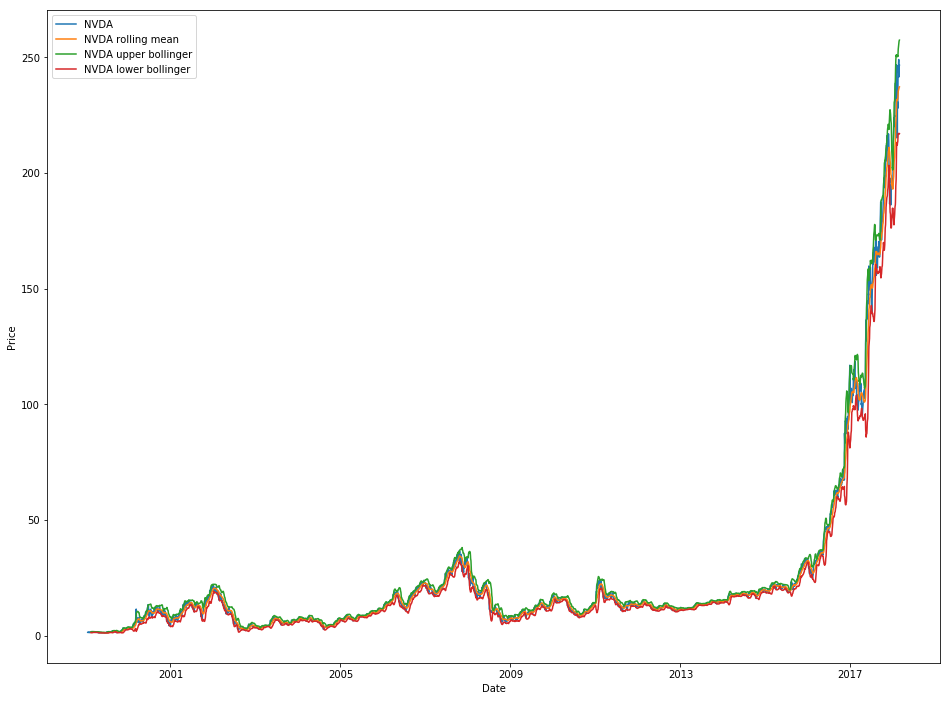

In [167]:
plt.plot(df['upper_bollinger'], label='NVDA upper bollinger')
plt.plot(df['lower_bollinger'], label='NVDA lower bollinger')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4804 entries, 1999-01-22 to 2018-02-26
Data columns (total 12 columns):
adj_open            4804 non-null float64
adj_high            4804 non-null float64
adj_low             4804 non-null float64
adj_close           4804 non-null float64
adj_volume          4804 non-null float64
rolling_mean        4785 non-null float64
shifted_price_5     4799 non-null float64
shifted_price_30    4774 non-null float64
shifted_price_90    4714 non-null float64
upper_bollinger     4785 non-null float64
lower_bollinger     4785 non-null float64
daily_return        4803 non-null float64
dtypes: float64(12)
memory usage: 487.9 KB


In [169]:
df.describe()

,adj_open,adj_high,adj_low,adj_close,adj_volume,rolling_mean,shifted_price_5,shifted_price_30,shifted_price_90,upper_bollinger,lower_bollinger,daily_return
count,4804.000000,4804.000000,4804.000000,4804.000000,4.804000e+03,4785.000000,4799.000000,4774.000000,4714.000000,4785.000000,4785.000000,4803.000000
mean,23.658029,24.056739,23.228946,23.660973,1.625728e+07,23.277278,23.683991,23.799774,24.083879,25.573172,20.981385,0.001833
std,38.204889,38.710817,37.605419,38.212354,1.190144e+07,36.988162,38.225601,38.291983,38.451515,40.176093,33.895850,0.039516
min,1.295193,1.319164,1.237200,1.266583,4.920000e+05,1.326897,1.266583,1.266583,1.266583,1.392586,1.148537,-0.352335
25%,8.068474,8.313981,7.831087,8.059195,8.814990e+06,7.890225,8.086646,8.184075,8.416050,9.186310,6.679560,-0.016419
50%,13.128070,13.403511,12.851411,13.129780,1.367350e+07,13.101711,13.139059,13.185454,13.305933,14.296908,11.677176,0.000765
75%,19.479441,19.731035,19.139382,19.440862,2.025615e+07,19.480803,19.457741,19.485759,19.602654,21.339432,17.909514,0.017601
max,251.690000,251.967500,244.600000,249.080000,2.307714e+08,237.254000,249.080000,249.080000,249.080000,257.465195,217.145498,0.424103


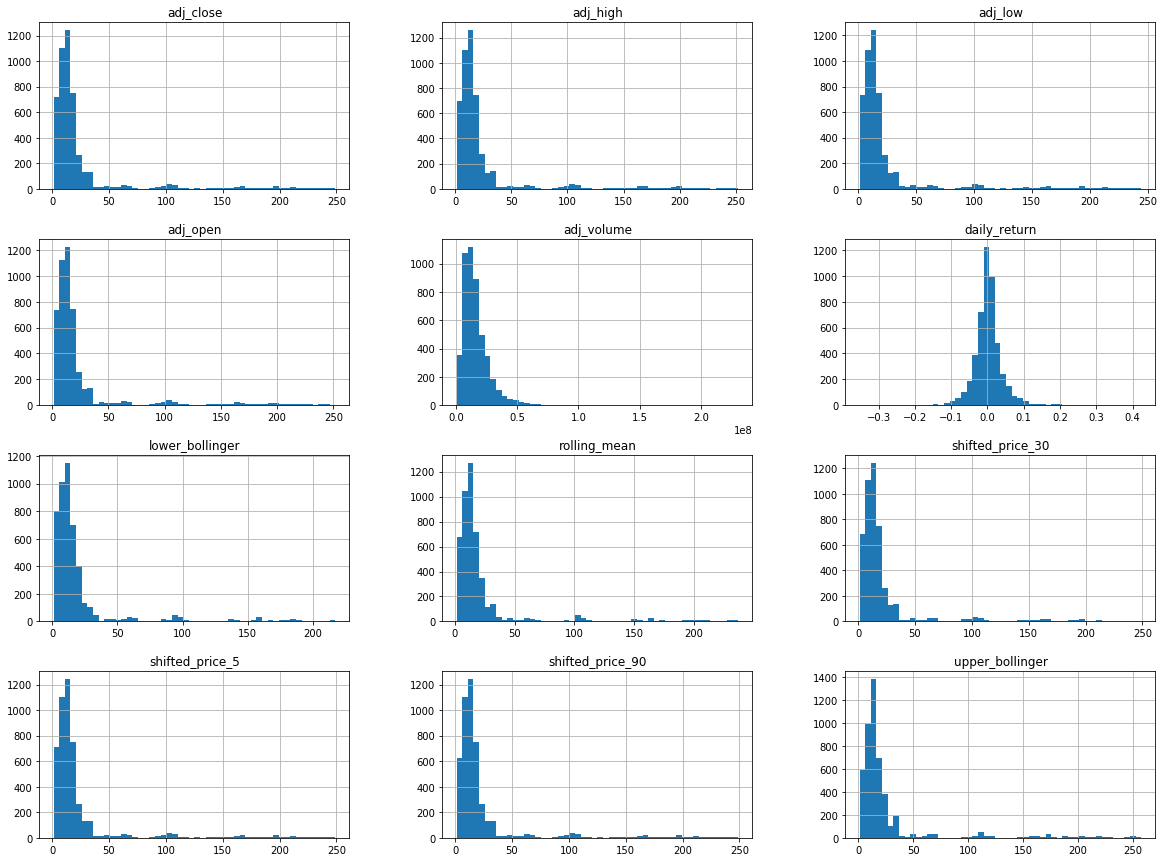

In [170]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [171]:
corr_matrix = df.corr()

In [172]:
corr_matrix['shifted_price_5'].sort_values(ascending=False)

shifted_price_5     1.000000
adj_close           0.997757
adj_high            0.997698
adj_low             0.997628
adj_open            0.997559
upper_bollinger     0.995874
rolling_mean        0.995765
lower_bollinger     0.992727
shifted_price_30    0.990764
shifted_price_90    0.979010
daily_return        0.020046
adj_volume         -0.027434
Name: shifted_price_5, dtype: float64

In [173]:
df = df.dropna()

In [174]:
df_features = df.drop(['shifted_price_30','shifted_price_5','shifted_price_90'], axis=1)

In [175]:
df_shifted_5 = df['shifted_price_5'].copy()

In [176]:
df_shifted_30 = df['shifted_price_30'].copy()

In [177]:
df_shifted_90 = df['shifted_price_90'].copy()

In [178]:
df_shifted_5.tail()

date
2017-10-09    197.93
2017-10-10    197.75
2017-10-11    197.58
2017-10-12    197.80
2017-10-13    196.90
Name: shifted_price_5, dtype: float64

In [226]:
df_features_test = df_features[['adj_close','rolling_mean']]

In [227]:
df_features_test.head()

,adj_close,rolling_mean
date,,
1999-02-19,1.614545,1.520557
1999-02-22,1.623824,1.525622
1999-02-23,1.701149,1.526588
1999-02-24,1.836468,1.540855
1999-02-25,1.778474,1.552453


In [228]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import Normalizer
# normalizer = Normalizer()
# df_features_test[df_features_test.columns] = normalizer.fit_transform(df_features_test[df_features_test.columns])

In [229]:
df_features_test.head()

,adj_close,rolling_mean
date,,
1999-02-19,1.614545,1.520557
1999-02-22,1.623824,1.525622
1999-02-23,1.701149,1.526588
1999-02-24,1.836468,1.540855
1999-02-25,1.778474,1.552453


In [230]:
df_features_test.describe()

,adj_close,rolling_mean
count,4695.000000,4695.000000
mean,20.105416,19.736224
std,27.926193,26.889375
min,1.266583,1.326897
25%,8.000042,7.772165
50%,12.987503,12.992683
75%,19.040987,18.907501
max,194.590000,182.289995


In [231]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

tscv = TimeSeriesSplit()
X = df_features_test.as_matrix()
y = df_shifted_90.as_matrix()
type(df_features)
for train_index, test_index in tscv.split(df_features_test):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [232]:
# use DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

clf = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("train score {}".format(train_score))
print("test score {}".format(test_score))


train score 1.0
test score -0.44211192815914657


In [233]:
# use SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVR(), param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'C': 0.1, 'gamma': 0.001}


In [234]:
clf = SVR(C=0.1, gamma=0.001).fit(X_train,y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("train score {}".format(train_score))
print("test score {}".format(test_score))

train score 0.4826412792782733
test score -0.5878320880736558


In [235]:
# do dimenstion reduction using PCA
# check # of features to keep
# run PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X_train)
clf = SVR(C=0.1, gamma=0.001).fit(X,y_train)
train_score = clf.score(X, y_train)
print("train score {}".format(train_score))

train score 0.48264127927827344


In [65]:
# use SVM again after PCA

In [ ]:
# use from keras.layers.recurrent import LSTM